In [1]:
##importing libraries
#data manipulation
import pandas as pd
import numpy as np
import re
import string

##Machine learning and text processing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from wordcloud import WordCloud

#libraries used for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the csv file
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dftrain=pd.read_csv(r"malignant_comments_clf_train_csv")
dftrain.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [4]:
dftrain.shape

(159571, 8)

In [5]:
# Creating the new column for comments_length
dftrain['comments_length'] = dftrain['comment_text'].str.len()
dftrain.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comments_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70


In [6]:
# cleaning the text data for vectorization
# defining the function
def clean_txt(text):
    text = text.lower() #Converting the text to lower case
    text = re.sub('\[.*?\]','',text) #Replacing email addresses
    text = re.sub('\\W', ' ', text) #Removing Punctuations
    text = re.sub('https?://\S+|www\.S+', '', text)  #Replace URLs with 'webaddress'
    text = re.sub('<.*?>+', '', text) #Removing the HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)#Removing Punctuations
    text = re.sub('\n', '', text) #Removing new lines
    text = re.sub('\w*\d\w*', '', text)
    tokenized_text = word_tokenize(text) #word_tokenization
    stop_words = set(stopwords.words('english') + ['u','ur','im','doin', 'ü', 'â', 'e', 'ur', 'doin', 'ure','READ MORE']) #declaring stop Stop_Words
    WL = WordNetLemmatizer() #declaring lemmatizer
    text = [WL.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()] # lemmatization and removal of stop_words
    return " " .join(text)

In [7]:
# applying the clean_txt function to the "news" column
dftrain['comment_text'] = dftrain['comment_text'].apply(clean_txt)
dftrain.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comments_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67


In [8]:
# Creating new column for cleaned comment length
dftrain['cleaned_com_text'] = dftrain["comment_text"].str.len()
dftrain.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comments_length,cleaned_com_text
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,156
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,67
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,363
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67,29
5,00025465d4725e87,congratulation well use tool well talk,0,0,0,0,0,0,65,38
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0,44,27
7,00031b1e95af7921,vandalism matt shirvington article reverted pl...,0,0,0,0,0,0,115,57
8,00037261f536c51d,sorry word nonsense offensive anyway intending...,0,0,0,0,0,0,472,277
9,00040093b2687caa,alignment subject contrary dulithgow,0,0,0,0,0,0,70,36


In [9]:
target = ['malignant', 'highly_malignant', 'loathe', 'rude', 'abuse', 'threat']
for i in target: 
    print(i)
    print(dftrain[i].value_counts())
    print("-----------------------------")

malignant
0    144277
1     15294
Name: malignant, dtype: int64
-----------------------------
highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64
-----------------------------
loathe
0    158166
1      1405
Name: loathe, dtype: int64
-----------------------------
rude
0    151122
1      8449
Name: rude, dtype: int64
-----------------------------
abuse
0    151694
1      7877
Name: abuse, dtype: int64
-----------------------------
threat
0    159093
1       478
Name: threat, dtype: int64
-----------------------------


malignant
0    144277
1     15294
Name: malignant, dtype: int64


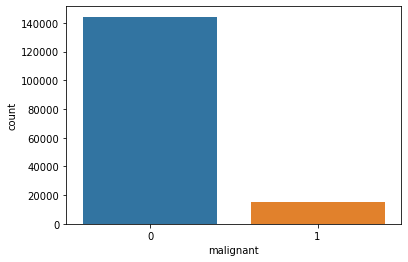

-------------------------------------------------------------------------------------
highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64


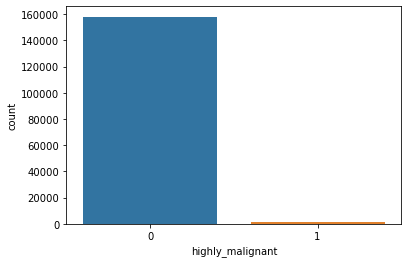

-------------------------------------------------------------------------------------
loathe
0    158166
1      1405
Name: loathe, dtype: int64


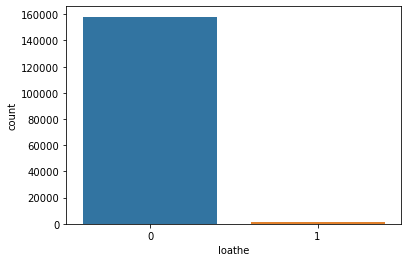

-------------------------------------------------------------------------------------
rude
0    151122
1      8449
Name: rude, dtype: int64


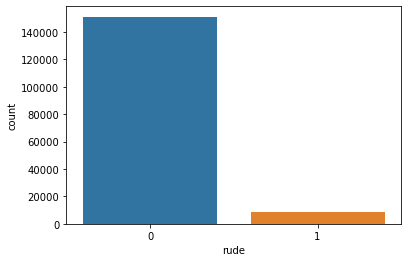

-------------------------------------------------------------------------------------
abuse
0    151694
1      7877
Name: abuse, dtype: int64


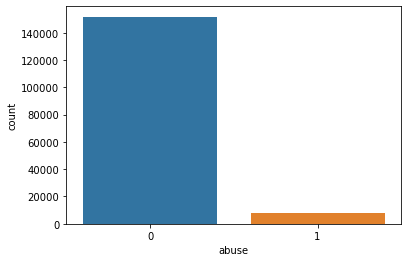

-------------------------------------------------------------------------------------
threat
0    159093
1       478
Name: threat, dtype: int64


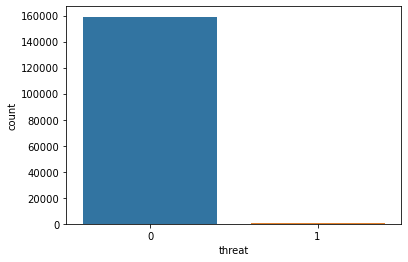

-------------------------------------------------------------------------------------


In [10]:
target = ['malignant', 'highly_malignant', 'loathe', 'rude', 'abuse', 'threat']
for i in target: 
    print(i)
    print(dftrain[i].value_counts())
    sns.countplot(dftrain[i])
    plt.show()
    print("-------------------------------------------------------------------------------------")

15294


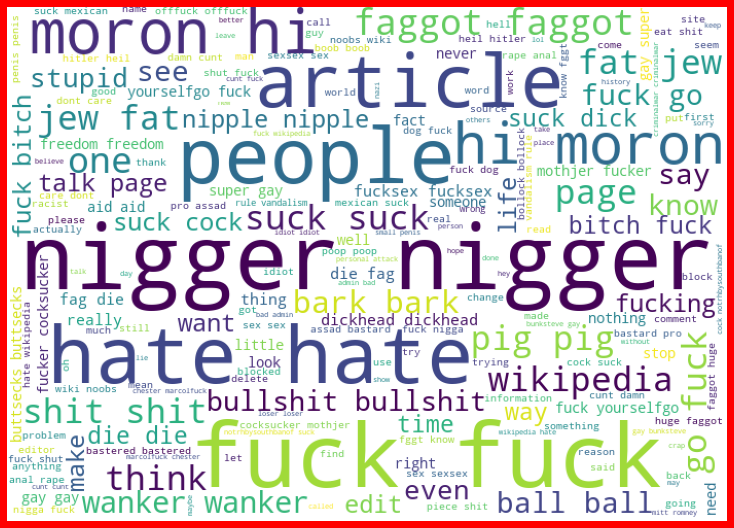

In [11]:
#Getting sense of words in malignant
plot = dftrain['comment_text'][dftrain['malignant']==1]
print(len(plot))
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

1595


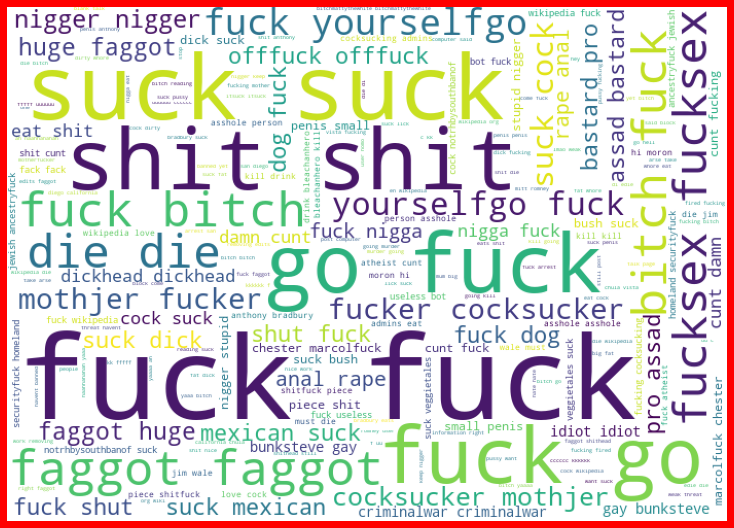

In [12]:
#Getting sense of words in highly_malignant
plot = dftrain['comment_text'][dftrain['highly_malignant']==1]
print(len(plot))
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

8449


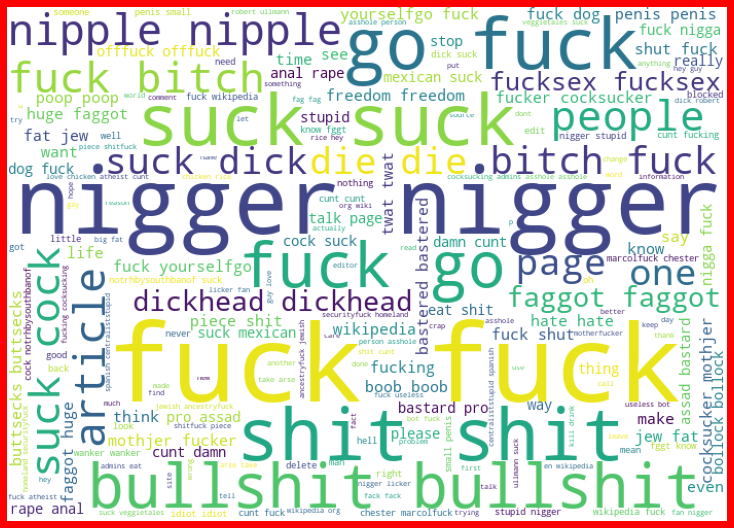

In [13]:
#Getting sense of words in highly_malignant
plot = dftrain['comment_text'][dftrain['rude']==1]
print(len(plot))
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

478


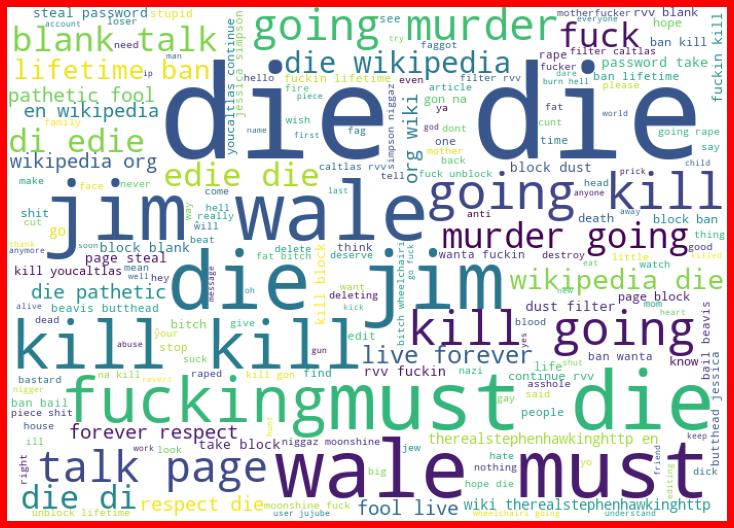

In [14]:
#Getting sense of words in highly_malignant
plot = dftrain['comment_text'][dftrain['threat']==1]
print(len(plot))
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

7877


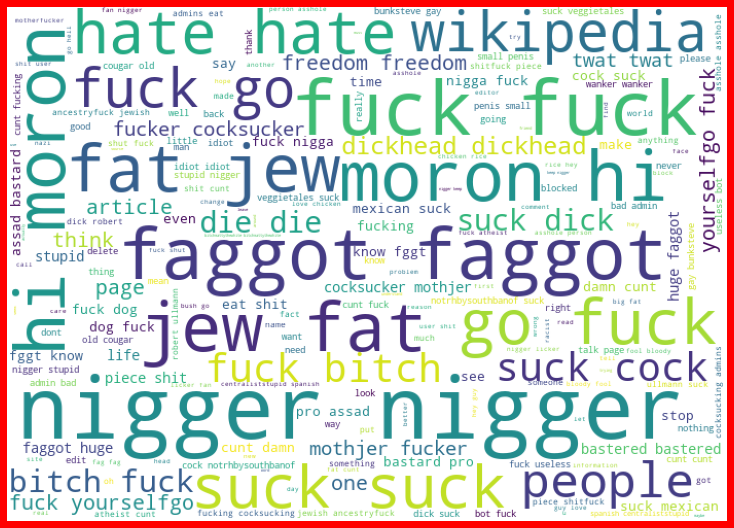

In [15]:
#Getting sense of words in highly_malignant
plot = dftrain['comment_text'][dftrain['abuse']==1]
print(len(plot))
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

1405


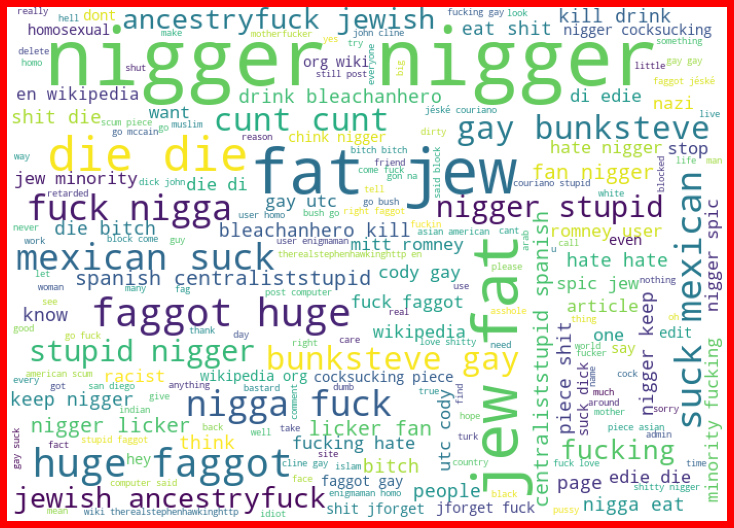

In [16]:
#Getting sense of words in highly_malignant
plot = dftrain['comment_text'][dftrain['loathe']==1]
print(len(plot))
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [17]:
dftrain[target].sum()

malignant           15294
highly_malignant     1595
loathe               1405
rude                 8449
abuse                7877
threat                478
dtype: int64

In [18]:
dftrain.shape

(159571, 10)

In [19]:
#adding a column representing the comments with all the target characterstics
dftrain["Target"] = dftrain[target].sum(axis=1)
dftrain.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comments_length,cleaned_com_text,Target
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,156,0
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,67,0
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141,0
3,0001b41b1c6bb37e,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,363,0
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67,29,0


In [20]:
dftrain["Target"].unique()

array([0, 4, 1, 3, 2, 5, 6], dtype=int64)

In [21]:
for i in range(0,7): 
    print(f'For value: {i}')
    print((dftrain["Target"]==(i)).sum())
    print("-----------------------")

For value: 0
143346
-----------------------
For value: 1
6360
-----------------------
For value: 2
3480
-----------------------
For value: 3
4209
-----------------------
For value: 4
1760
-----------------------
For value: 5
385
-----------------------
For value: 6
31
-----------------------


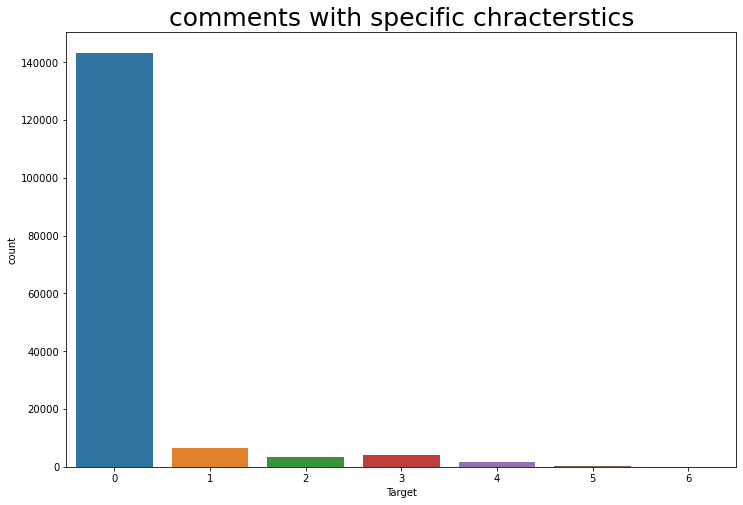

In [22]:
#comments with all the chracterstics
plt.figure(figsize=(12,8))
sns.countplot(dftrain["Target"])
plt.title("comments with specific chracterstics",fontsize=25)
plt.show()

In [23]:
dftrain['Target'] = dftrain['Target'] > 0 
dftrain['Target'] = dftrain['Target'].astype(int)
print(dftrain['Target'].value_counts())

0    143346
1     16225
Name: Target, dtype: int64


In [24]:
dftrain.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comments_length,cleaned_com_text,Target
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,156,0
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,67,0
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141,0
3,0001b41b1c6bb37e,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,363,0
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67,29,0
5,00025465d4725e87,congratulation well use tool well talk,0,0,0,0,0,0,65,38,0
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0,44,27,1
7,00031b1e95af7921,vandalism matt shirvington article reverted pl...,0,0,0,0,0,0,115,57,0
8,00037261f536c51d,sorry word nonsense offensive anyway intending...,0,0,0,0,0,0,472,277,0
9,00040093b2687caa,alignment subject contrary dulithgow,0,0,0,0,0,0,70,36,0


In [25]:
dftrain = dftrain.drop(['id'], axis = 1)

In [26]:
dftrain.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comments_length,cleaned_com_text,Target
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,156,0
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,67,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141,0
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,363,0
4,sir hero chance remember page,0,0,0,0,0,0,67,29,0
5,congratulation well use tool well talk,0,0,0,0,0,0,65,38,0
6,cocksucker piss around work,1,1,1,0,1,0,44,27,1
7,vandalism matt shirvington article reverted pl...,0,0,0,0,0,0,115,57,0
8,sorry word nonsense offensive anyway intending...,0,0,0,0,0,0,472,277,0
9,alignment subject contrary dulithgow,0,0,0,0,0,0,70,36,0


In [27]:
dftrain.Target.unique()

array([0, 1])

# Feature Extraction

In [28]:
tfidf = TfidfVectorizer(max_features= 2000)

In [29]:
x = tfidf.fit_transform(dftrain['comment_text'])
y = dftrain[['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']]

In [30]:
#Creating train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30)

In [31]:
x.shape, y.shape

((159571, 2000), (159571, 6))

In [32]:
x_train.shape, y_train.shape

((111699, 2000), (111699, 6))

# MODEL BUILIDING :

In [33]:
#pip install scikit-multilearn

In [34]:
#Importing all the model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,f1_score, log_loss
from sklearn.model_selection import GridSearchCV,cross_val_score

#importing multilabel calssification libraries
import skmultilearn
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain

In [35]:
#declaring models
LR = LogisticRegression()
SVC= LinearSVC(random_state=0)
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()

In [36]:
#appending models
models= []
models.append(LR)
models.append(MNB)
models.append(SVC)
models.append(RF)
models.append(ADA)

#appending estimators
estimators = []
estimators.append(BinaryRelevance)
estimators.append(ClassifierChain)


In [ ]:
# Creating empty list
Model=[]
Estimator = []
F1_Score = []

# creating a loop to run the data through the models

for model in models:
    
    for estimator in estimators:
        
        # model fitting
        clf=estimator(model)
        Model.append(model)
        Estimator.append(estimator)
        clf.fit(x_train,y_train)
        clf_pred=clf.predict(x_test)
        #f1_score
        F1Score = f1_score(clf_pred, y_test, average='micro')
        F1_Score.append(F1Score*100)

        #acc=accuracy_score(y_test,clf_pred)
        #ll=log_loss(y_test,clf_pred.toarray())
        #print('accuracy',acc)
        #print('log_loss',ll)
        #print('\n')
        #print(classification_report(y_test,clf_pred))
        #print('\n') 

In [ ]:
#Finalizing the result
Scores=pd.DataFrame({'Model':Model, 'Estimator': Estimator, 'F1_Score':F1_Score})
Scores

# HYPER PARAMETER TUNING :

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'classifier':[LinearSVC()],'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}]
Grid=GridSearchCV(BinaryRelevance(),parameters,refit = True, verbose = 3)
Grid.fit(x_train,y_train)

In [ ]:
print (Grid.best_params_, Grid.best_score_)

In [ ]:
clf=ClassifierChain(MultinomialNB(alpha=1))
clf.fit(x_train,y_train)
clf_pred=clf.predict(x_test)
acc=accuracy_score(y_test,clf_pred)
ll=log_loss(y_test,clf_pred.toarray())
print({'accuracy':acc,'log_loss':ll})

In [ ]:
print(classification_report(y_test,clf_pred))

# Saving the job file :

In [ ]:
# Creating Pickle File
import joblib
joblib.dump(clf,'Malignant_Comments_Classifier_FR.pkl')

# PREDICTIONS ON THE TEST DATA :

In [ ]:
dftest = pd.read_csv(r'malignant_comments_clf_test_csv')
dftest.head(5)

In [ ]:
dftest.shape

In [ ]:
dftest.drop('id',axis=1,inplace=True)
dftest.head(5)

In [ ]:
# applying the clean_txt function to the "news" column
dftest['comment_text'] = dftrain['comment_text'].apply(clean_txt)
dftest.head(5)

# Test Feature Extraction :

In [ ]:
# vectorization
xtest = tfidf.fit_transform(dftest['comment_text'])

In [ ]:
#loading the model
test_model = joblib.load('Malignant_Comments_Classifier_FR.pkl')

# Test data set Predictions :

In [ ]:
df_pred = test_model.predict(xtest)
df_predict = df_pred.toarray()
Malinant_comments_predictions = pd.DataFrame(df_predict)

In [ ]:
Malinant_comments_predictions.head(10)